## Classification Models

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [80]:
df = pd.read_csv('./health_outcomes.csv')
df.head()


,county_name,population,pop_change_2010,perc_under_18,perc_csec,perc_lowbirth,perc_prenat_1tri,perc_preterm,perc_non_smoke,fert_15_44,...,gono_per_100000,perc_smoker,hiv_tested,perc_no_healthins,perc_obese,perc_routine_checkup,beds_per_1000,inpatient_occupancy_rate,admission_per_1000,MetGoals_Reached
0,York,449058.0,3.2,21.9,30.1,8.4,74.6,9.9,88.6,60.3,...,89.0,16.0,40.0,8.0,30.0,88.0,1.6,79.8,87.0,0
1,Clinton,38632.0,-1.5,19.5,27.3,6.8,68.8,8.8,82.9,52.5,...,25.8,21.0,33.0,8.0,36.0,89.0,0.6,27.9,19.0,0
2,Susquehanna,40328.0,-7.0,18.4,31.8,7.2,64.2,9.1,78.0,61.4,...,10.7,19.0,42.0,10.0,35.0,88.0,1.2,27.6,33.5,0
3,Northampton,305285.0,2.5,19.8,32.7,8.2,78.2,9.5,89.9,50.9,...,118.7,18.0,45.0,6.0,32.0,89.0,1.1,43.2,44.7,1
4,Jefferson,43425.0,-3.9,21.1,26.4,8.0,71.8,8.5,79.9,66.6,...,16.0,27.0,35.0,10.0,41.0,86.0,1.9,41.5,46.4,1


In [72]:
df['MetGoals_Reached'].value_counts()

0      75
DSU    75
1      69
Name: MetGoals_Reached, dtype: int64

## KNN Classifier

In [81]:
outcomes = df[df.MetGoals_Reached != 'DSU']

In [99]:
data = outcomes.columns[1:-1]
target = outcomes.columns[-1]

In [100]:
X = outcomes[data]
y = outcomes[target]
y=y.astype('int')


# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
  
X = imputer.transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=60)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)                                    
print(knn.predict(X_test))

[0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0
 1 1 1 1 1 0 0]


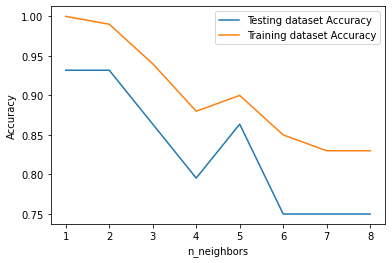

In [102]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Cluster Plots

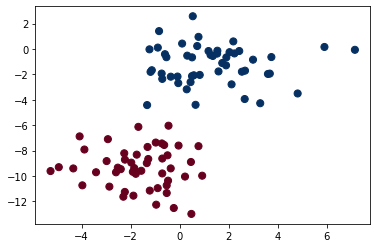

In [86]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [115]:
norm = StandardScaler().fit(X_train)

## Do cross-val --> test different hyperparameters: C values, try L1 & L2 norms
logreg = LogisticRegression(max_iter=5000)
logreg.fit(norm.transform(X_train), y_train)
logreg.score(norm.transform(X_train), y_train)

0.95

## Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)

X = imputer.transform(df.iloc[:, 1:-1])
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [126]:
## test hyperparameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9848484848484849